Now I try to implement the same problem by using python packages. The code is as follows:

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/Nika/Desktop/Stress-Lysis.csv")
df = pd.DataFrame(data, columns=["Humidity", "Temperature", "Step_count", "Stress_Level"])

X = np.asarray(df[['Temperature','Humidity']])
y = np.asarray(df['Stress_Level'])
training_data, testing_data, training_labels, testing_labels = train_test_split(X,y)                                 
print(training_data)
print(training_labels)

[[94.11 25.11]
 [81.18 12.18]
 [85.48 16.48]
 ...
 [87.38 18.38]
 [91.79 22.79]
 [97.51 28.51]]
['high' 'low' 'mid' ... 'mid' 'mid' 'high']


I use **OneVsRestClassifier** to simply calculate the accuracy of the one vs all logistic regression model:

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC()).fit(training_data, training_labels)
print("accuracy =",clf.score(testing_data,testing_labels))

accuracy = 0.93812375249501


For calculating different evaluation metrics, sklearn library can be used as follows:


The **Jaccard Score**:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

LR = LogisticRegression(C=0.01, solver='liblinear').fit(training_data,training_labels)
yhat = LR.predict(testing_data)
yhat_prob = LR.predict_proba(testing_data)
print(jaccard_score(testing_labels, yhat, average=None))

[0.92890995 0.9375     0.87567568]


Calculating the 3x3 **confusion matrix** for the 3 classes as follows:

[[196   0   0]
 [  0 120   0]
 [ 15   8 162]]


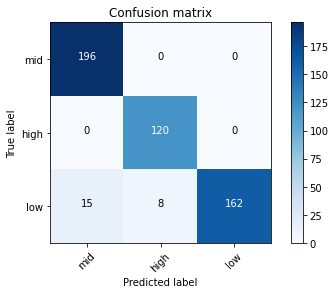

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(testing_labels, yhat)
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['mid', 'high', 'low'],
                      normalize=False,
                      title='Confusion matrix')

calculating the **F1 Score**:

In [29]:
from sklearn.metrics import f1_score
f1_score(testing_labels, yhat, average = None)

array([0.31088083, 0.25498008, 0.33424658])

A complete report of the regression model as below:


As we see, the model has an **accuracy** of 0.93 which is pretty good.

In [22]:
print (classification_report(testing_labels, yhat))

              precision    recall  f1-score   support

        high       0.93      1.00      0.96       196
         low       0.94      1.00      0.97       120
         mid       1.00      0.88      0.93       185

    accuracy                           0.95       501
   macro avg       0.96      0.96      0.95       501
weighted avg       0.96      0.95      0.95       501

